<a href="https://colab.research.google.com/github/Honey0901/ml-projects/blob/main/04_tiaticnic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report

In [141]:
df=pd.read_csv("/content/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
df.isnull().mean()

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [143]:
x=df.drop(columns=['Survived','PassengerId','SibSp','Parch','Name','Ticket','Cabin'])
y=df['Survived']

In [144]:
x.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S


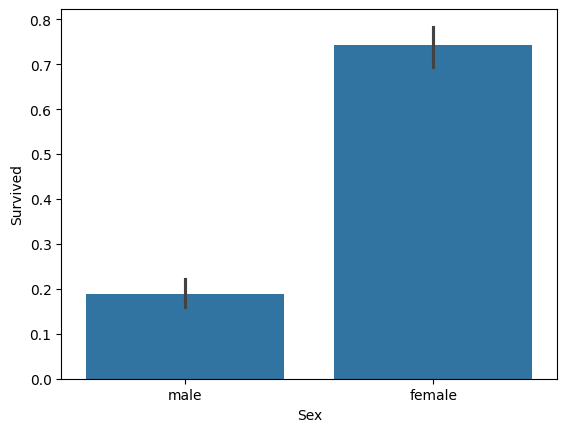

In [156]:
sns.barplot(x='Sex',y='Survived',data=df)
plt.show()

In [146]:
X_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [147]:
X_train.shape,x_test.shape

((623, 5), (268, 5))

In [148]:
X_train.isnull().mean()



,0
Pclass,0.000000
Sex,0.000000
Age,0.199037
Fare,0.000000
Embarked,0.001605


In [149]:
transformer=ColumnTransformer([
    ('tnf1',SimpleImputer(strategy="mean"),['Age']),
    ('tnf2',StandardScaler(),['Fare']),
     ('tnf3',OneHotEncoder(),['Sex','Embarked'])
],remainder='passthrough')

In [150]:
clf=Pipeline(steps=[("transformer",transformer),('classifier',LogisticRegression())])

In [151]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppr

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1', SimpleImputer(),
                                                  ['Age']),
                                                 ('tnf2', StandardScaler(),
                                                  ['Fare']),
                                                 ('tnf3', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression())])

In [152]:
y_predict=clf.predict(x_test)

In [153]:
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))


0.7947761194029851
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       157
           1       0.76      0.73      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268

